### Load The Dataset

In [1]:
import opendatasets as od
import numpy as np

In [2]:
od.download("https://www.kaggle.com/datasets/vikrishnan/boston-house-prices")

Skipping, found downloaded files in ".\boston-house-prices" (use force=True to force download)


In [3]:
import os

In [4]:
data_dir = "boston-house-prices"
os.listdir(data_dir)

['.ipynb_checkpoints', 'housing.csv']

In [5]:
train_csv = data_dir + '/housing.csv'

In [6]:
train_csv

'boston-house-prices/housing.csv'

In [7]:
import pandas as pd 
import numpy as np

In [8]:
## Some of rows have multiple spaces. We can easly solve this problem with sep.
raw_df = pd.read_csv(train_csv, sep=r'\s+') 

##### Columns:
    CRIM: Crime rate per capita for each town.
    
    ZN: Percentage of residential areas larger than 25,000 sq.ft.
    
    INDUS: Percentage of non-retail businesses in a town.
    
    CHAS: Proximity to the Charles River, 1 is close, 0 is not.
    
    NOX: Nitrite oxide (NOx) concentration, an indicator of air pollution.
    
    RM: Average number of rooms in a house.
    
    AGE: Percentage of properties built before 1940.
    
    DIS: Weighted distances to five Boston business districts.
    
    RAD: Index of access to circular highways.
    
    TAX: Property tax rate per $10,000.
    
    PTRATIO: Student-teacher ratio for each town.
    
    B: A value calculated based on the percentage of blacks in the town.
    
    LSTAT: Shows the percentage of the population in the lower income group.
    
    PRICE: Shows the median value of homes owned (in $1000).

In [9]:
## Original csv file does not include column names so I add manually.
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", 
    "RAD", "TAX", "PTRATIO", "B", "LSTAT","PRICE"
]

In [10]:
raw_df.columns = columns

In [11]:
raw_df

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
1    0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
2    0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
3    0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
4    0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222.0   
..       ...  ...    ...   ...    ...    ...   ...     ...  ...    ...   
500  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
501  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
502  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
503  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
504  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       17.8  396.90   9.14   21.6  
1       17.8  392.83   4.03   34.7  
2       18.7  394.63   2.94   33.4  
3       18.7  396.90   5.33   36.2  
4       18.7  394.12   5.21   28.7  
..       ...     ...    ...    ...  
500     21.0  391.99   9.67   22.4  
501     21.0  396.90   9.08   20.6  
502     21.0  396.90   5.64   23.9  
503     21.0  393.45   6.48   22.0  
504     21.0  396.90   7.88   11.9  

[505 rows x 14 columns]

### Data Preprocessing

In [12]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Checking Data Types And Null Values

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  PRICE    505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


### Data Visualizations

Text(0.5, 1.0, 'Distribution of Price')

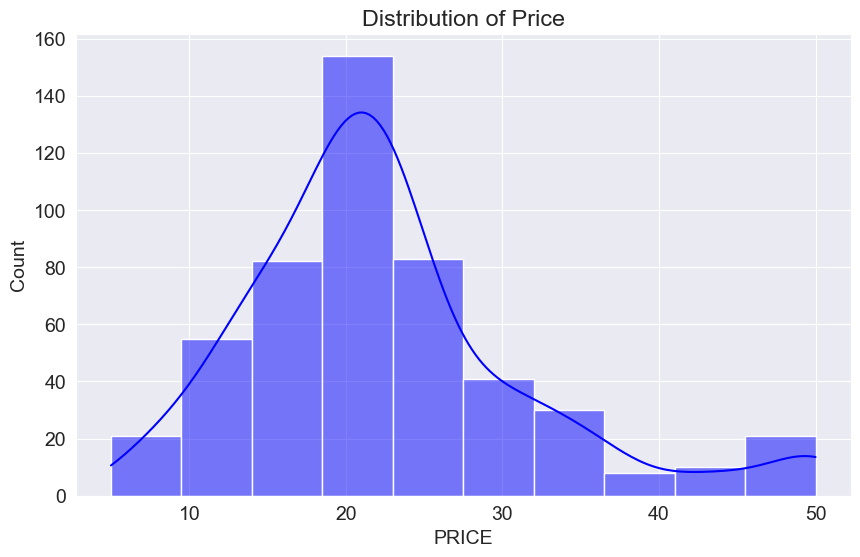

In [14]:
sns.histplot(data=raw_df['PRICE'], kde=True, color='blue', bins=10)
plt.title("Distribution of Price")

In [15]:
px.scatter(data_frame=raw_df,x="LSTAT",y="PRICE",title="Distribution Of Lower Status Of The population")

C:\Users\grapl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



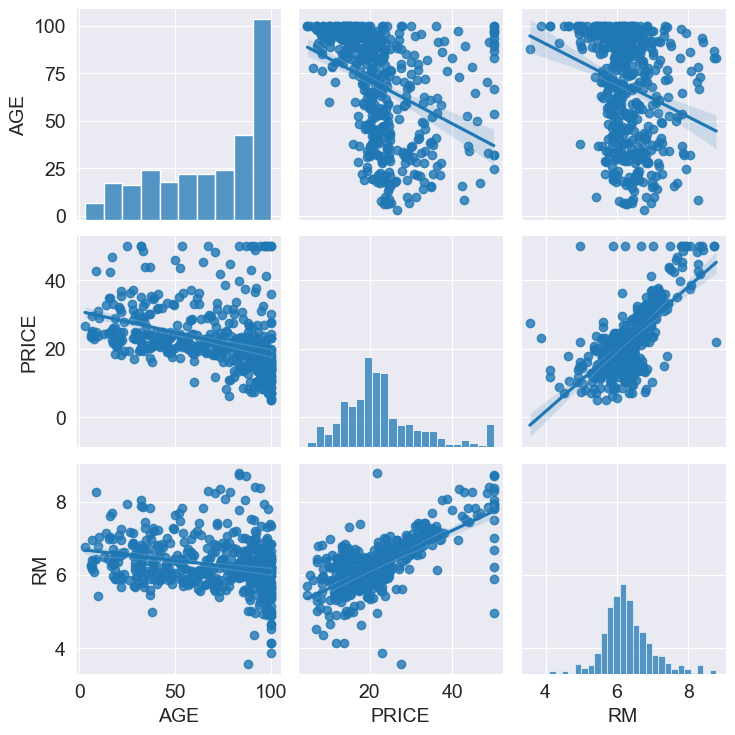

In [16]:
sns.pairplot(data=raw_df,vars=["AGE","PRICE","RM"],kind = "reg")

### Correlations

In [17]:
corrs = raw_df.corr()
price = corrs["PRICE"]
price.sort_values()

LSTAT     -0.738187
PTRATIO   -0.508411
INDUS     -0.484126
TAX       -0.468543
NOX       -0.427295
CRIM      -0.388249
RAD       -0.381690
AGE       -0.376932
CHAS       0.175364
DIS        0.249896
B          0.333394
ZN         0.360393
RM         0.695365
PRICE      1.000000
Name: PRICE, dtype: float64

<Axes: >

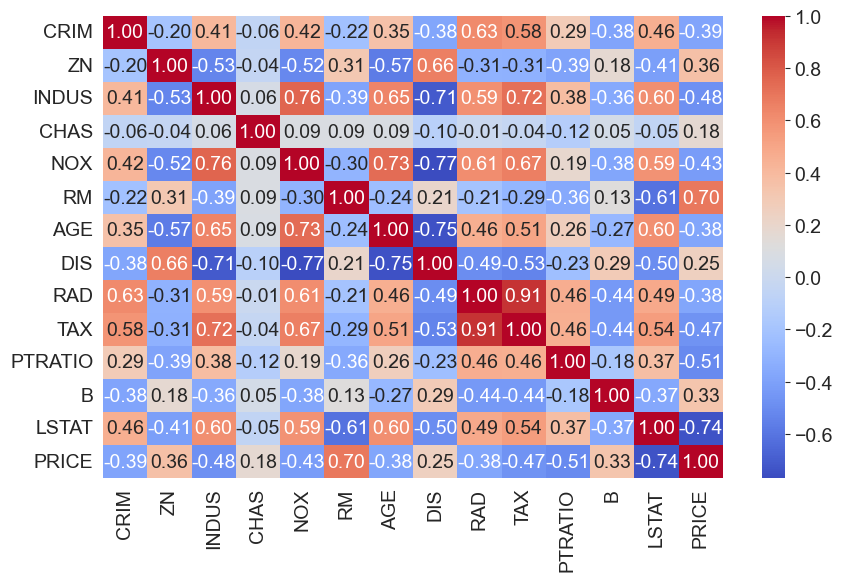

In [18]:
sns.heatmap(data=corrs,cmap="coolwarm",annot = True,fmt=".2f")

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
inputs = np.array(columns)
inputs = raw_df[inputs[inputs != "PRICE"]]
target = raw_df["PRICE"]

In [21]:
scaler = StandardScaler()
scaler.fit(inputs)
scaled_inputs = scaler.transform(inputs)

### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs,target,test_size=0.2)

### Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
from sklearn.metrics import root_mean_squared_error

In [27]:
train_predictions = model.predict(X_train)
train_error = root_mean_squared_error(train_predictions,y_train)
print("-------------------------------------------")
print(f"RMSE for X_train values ==> {train_error}")

-------------------------------------------
RMSE for X_train values ==> 4.68611887924723


In [29]:
test_predictions = model.predict(X_test)
test_error = root_mean_squared_error(test_predictions,y_test)
print("-------------------------------------------")
print(f"RMSE for X_test values ==> {test_error}")

-------------------------------------------
RMSE for X_test values ==> 4.767791752687319


Text(0, 0.5, 'Estimated Values')

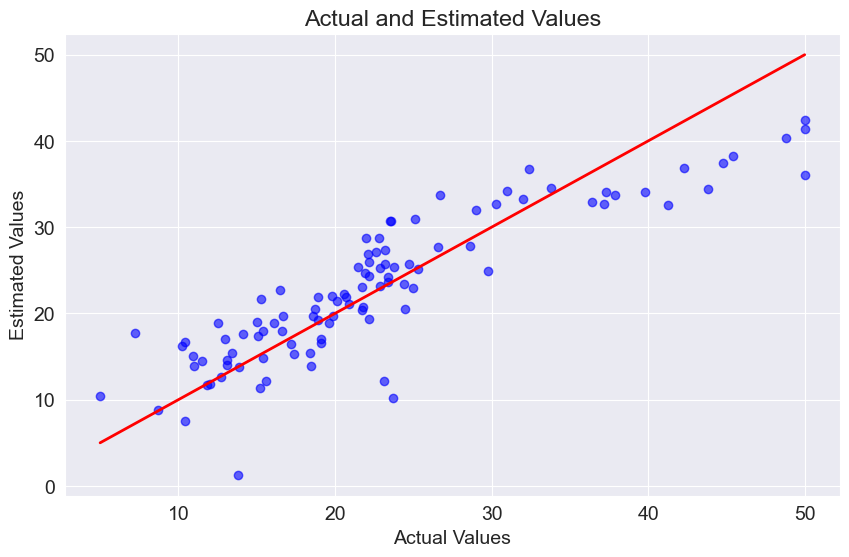

In [36]:
plt.scatter(y_test, test_predictions, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

plt.title('Actual and Estimated Values')
plt.xlabel('Actual Values')
plt.ylabel('Estimated Values')